# Aula 9



**Sistemas de equações diferenciais ordinárias** <br>
<br>
**Exemplo 1** <br>
Em inúmeros problemas de engenharia química, nos deparamos com sistemas de equações diferenciais ordinárias (EDOs). <br>
Na aula de hoje iremos complementar o que vimos na aula passada através da resolução de sistemas de EDOs. <br>
Iniciemos considerando um sistema simples de EDOs: <br>
$\frac {dy_1}{dx} =  0.45y_1$ <br>
$\frac {dy_2}{dx} = -0.5y_1y_2$ <br>
$y_1(0) = 1$ <br>
$y_2(0) = 100$ <br>
$x = 0..10$

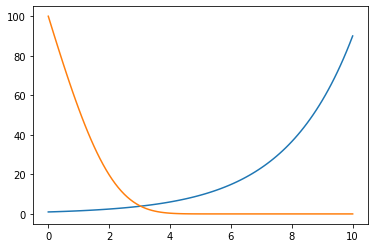

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Definir sistema de EDOs
def func1(y,x):
    dy1dx = 0.45*y[0]
    dy2dx = -0.5*y[1]*y[0]
    return [dy1dx, dy2dx]

# Definir condições iniciais e variável independente
y0 = [1, 100]
x  = np.arange(0,10.1,0.1)
# Chamada da função a ser integrada
y  = odeint(func1, y0, x)

# Gráfico
plt.plot(x,y)

Assim, no exemplo anterior pudemos obter a integração numérica de um sistema de EDOs através do uso da função odeint com os seguintes passos: <br>
- Importamos as bibliotecas necessárias (numpy, pyploy e odeint); <br>
- Definimos a função que contém ambas EDOs (func1, da linha 5 a linha 8). Note que o comando _return_ possui ambas EDOs (dy1dx e dy2dx), para que a solução de todo o sistema seja inclusa; <br>
- Definimos as condições iniciais para ambas EDOs; <br>
- Definimos a variável independente de integração (x); <br>
- Realizamos a chamada da função (que contém o sistema de EDOs) a ser integrada pela função _odeint_, cujos argumentos são: <br>
$$ odeint(funcao_a_ser_integrada, condicoes_iniciais, var_independente) $$ <br>
- Plotamos os resultados. <br>
<br>
Assim, a diferença básica entre a resolução de uma EDO para um sistema de EDOs é a quantidade de condições iniciais e equações no _return_ da função a ser integrada.


**Exemplo 2** <br>
Equações do tipo Lotka-Volterra, também conhecidas como equações de presa-predador, são equações diferenciais não-lineares de primeira ordem. Essas equações são da forma: <br>
$\frac{dx}{dt} = a_1x - a_2xy$ <br>
$\frac{dy}{dt} = a_3xy - a_4y$ <br>
Resolvamos o sistema de EDOs acima com os seguintes parâmetros e condições iniciais: <br>
$a_1 = 1.1$ <br>
$a_2 = 0.4$ <br>
$a_3 = 0.1$ <br>
$a_4 = 0.4$ <br>
$x(0) = 10$ <br>
$y(0) = 10$ <br>

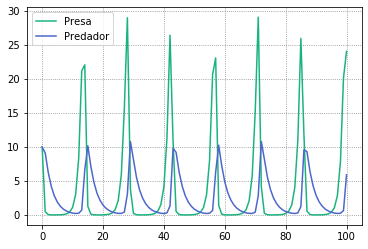

In [67]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Definição da função a ser integrada
def presapred(x,t):
    dxdt = a1*x[0] - a2*x[0]*x[1]
    dydt = a3*x[0]*x[1] - a4*x[1]
    return [dxdt, dydt]
# Parâmetros
a1 = 1.1
a2 = 0.4
a3 = 0.1
a4 = 0.4
# Condições iniciais
x0 = [10,10]
# Tempo de integração
t  = np.arange(0,101,1)
# Chamada da função
x = odeint(presapred, x0,t)
# Plot dos resultados
plt.plot(t,x[:,0],label='Presa',color=[0.1, 0.7, 0.5])
plt.plot(t,x[:,1],label='Predador',color=[0.3, 0.4, 0.8])
plt.legend()
plt.grid(color=[0.5, 0.5, 0.5], linestyle=':')

Da mesma maneira que no exemplo anterior, iniciamos importanto as bibliotecas necessárias e definindo a função que deve conter o sistema de EDOs (linhas 6-9). Nas linhas seguintes, são definidos os parâmetros que serão utilizados, as condições iniciais (ambas alocadas em x0, na linha 16), a variável independente (tempo de integração) e, finalmente, a chamada da função que será integrada. <br>
As linhas do gráfico são plotadas separadamente através dos comandos das linhas 22 e 23. Assim, definimos a variável do eixo x (_t_), depois a variável do eixo y. As variáveis do eixo y são x[:,0] e x[:,1], as quais se referem, respectivamente, aos resultados de x (pela primeira equação, 1) para todos os valores de tempo (:) e aos resultados de y (segunda equação, 2) par todos os valores de tempo (:). As legendas foram definidas através do comendo _label='nome'_ e as cores através do comando _color=[R, G, B]_. A linha 24 é utilizada para determinar que as legendas, definidas nas linhas 22 e 23, estejam aparecendo. E, por fim, a linha 25 insere linhas de grade na figura com um tom de cinza e estilo de linha pontilhado. <br>
<br>
Experimente agora trocar os valores dos parâmetros e/ou das condições iniciais e veja como o sistema se comporta.

**Exemplo 3** <br>
Quando tratamos de uma reação multicomponentes, podemos, em alguns casos, obter reações oscilatórias, como é o caso do exemplo a seguir, retirado dos exercícios do capítulo 8 do livro de reações do Fogler. <br>
O exemplo trata de uma reação do tipo Belousov-Zhabotinsky (BZ). Maiores informações sobre as hipóteses assumidas e uma explicação sobre os balanços do problema podem ser encontrados em http://www.umich.edu/~elements/fogler&gurmen/html/web_mod/oscil/mod.htm. <br>
Basicamente, temos um reator em batelada com o seguinte sistema de reações: <br>
<br>
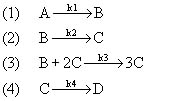 <br>
<br>
Em se tratando de uma reação em batelada, temos as seguintes equações do modelo: <br>
$\frac {dC_A}{dt} = -k_1 C_A$ <br>
$\frac {dC_B}{dt} = k_1 C_A - k_2 C_B - k_3 C_B C_C^2$ <br>
$\frac {dC_C}{dt} = k_2 C_B + k_3 C_B C_C^2 - k_4 C_C$ <br>
$\frac {dC_D}{dt} = k_4 C_C$ <br>
As condições iniciais são: <br>
$C_A(0) = 0.01$ <br>
$C_B(0) = 2e-5$ <br>
$C_C(0) = 1e-5$ <br>
$C_D(0) = 0.00$ <br>
E os parâmetros: <br>
$k_1 = 0.001 min^{-1}$ <br>
$k_2 = 0.01 min^{-1}$ <br>
$k_3 = 2.5 \cdot 10^{9} \frac{dm^{6}}{mol^2 min}$ <br>
$k_4 = 1 min^{-1}$ <br>

Text(0, 0.5, 'Concentração [mol/dm3]')

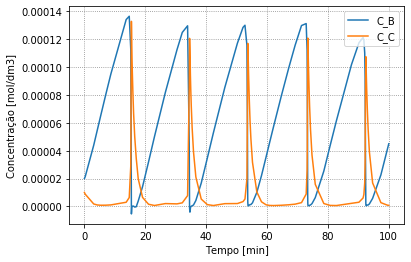

In [116]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir sistema de EDOs
def osc_react(t,C):
    dCdt = [-k1*C[0],
            k1*C[0]-k2*C[1]-k3*C[1]*C[2]**2,
           k2*C[1]+k3*C[1]*C[2]**2-k4*C[2],
           k4*C[2]]
    #dCdt = np.zeros(4)
    #dCdt[0] = -k1*C[0]
    #dCdt[1] = k1*C[0]-k2*C[1]-k3*C[1]*C[2]**2
    #dCdt[2] = k2*C[1]+k3*C[1]*C[2]**2-k4*C[2]
    #dCdt[3] = k4*C[2]
    return dCdt

# Definir parâmetros
k1 = 0.001
k2 = 0.01
k3 = 2.5e9
k4 = 1
C0 = [0.01, 2e-5, 1e-5, 0.00]
t = [0, 100]
C = solve_ivp(osc_react,t,C0,method='RK45')
#print(C)
#print(C.y)
#print(C.t)
plt.plot(C.t,C.y[1,:],label='C_B')
plt.plot(C.t,C.y[2,:],label='C_C')
plt.legend(loc='upper right')
plt.grid(color=[0.5,0.5,0.5],linestyle=':')
plt.xlabel('Tempo [min]')
plt.ylabel('Concentração [mol/dm3]')

Neste exemplo, foi necessário o uso de um integrador numérico diferente, o _solve_ivp_ com o método de Runge-Kutta de 4a e 5a Ordem, pois o método anterior apresentou problemas de integração (refaça o exemplo com o método anterior e verifique as diferenças). <br>
Iniciamos, novamente, importando as bibliotecas necessárias. Note que nete exemplo importamos a função _solve_ivp_ da biblioteca de integração numérica do SciPy (linha 4). <br>
Na definição da função com o sistema de EDOs, é neessário trocar a ordem dos argumentos (essa é uma atualização para funções mais recentes do SciPy), assim a sintaxe se torna: _def nome_função(var_independente, var_dependente)_ <br>
Desta vez, optou-se por utilizar o sistema de EDOs dentro de uma mesma variável, o vetor dCdt. Assim, cada elemento do vetor será uma das equações (separadas por vírgulas), sendo necessário apenas _dCdt_ no comando _return_. <br>
Note que há uma segunda opção de utilização nos comentários do código. Essa abordagem define separadamente os elementos do vetor dCdt, sendo necessário a declaração do tamanho do vetor antecipadamente (linha 12). <br>
A chamada para a integração numérica, feita na linha 26, também passou por uma pequena modificação na sintaxe. Vejamos como ficou: <br>
_resultados = solve_ivp(nome_funcao, var_independente, cond_iniciais, method='método')_ <br>
Assim, a variável independente (_t_, para este exemplo) agora aparece, novamente, antes das condições iniciais. Além disso, precisamos definir um dos métodos disponíveis (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp), neste caso utilizamos RK45, que se refere ao método de Runge-Kutta de 4a e 5a Ordem. <br>
Note também que agora a variável independentes não é mais definida como um vetor com todos os pontos para integração, mas recebe apenas os limites de integração numérica. Neste caso, então, _t_ passou a ser um vetor com 2 elementos apenas, os limites de integração 0 e 100. <br>
No lado esquerda da chamada da linha 26 ficam os resultados, aqui salvos na variável C. Nesta variável ficam gravada várias informações sobre a integração, desde os valores das variáveis dependentes e independentes até o relatório sobre o sucesso ou não da integração numérica (experimente "descomentar" alguma das linhas 27-29 e veja os resultados). <br>
Assim, os resultados obtidos para as variáveis dependentes e independentes ficam gravados na variável C como _C.y_ e _C.t_, respectivamente, e são essas as variáveis que utilizaremos para a obtenção do gráfico. <br>
Neste caso, nosso interesse fica apenas nos componentes B e C. Assim, na linha 30 o eixo x é definido como _C.t_ e o eixo y como _C.y[1,:]_, o que significa que estamos utilizando a segunda linha e todas as colunas do vetor _C.y_ (que possui 4 linhas, uma para cada elementos, e um número de colunas igual ao tamanho do vetor _C.t_). <br>

**Exemplo 4** <br>
Considere agora um tanque de armazenamento de água. <br>
O tanque, que está com uma altura de líquido de $5 ft$ a $25 ^\circ C$, recebe uma vazão de $5 \frac{ft^3}{min}$ a $55 ^\circ C$. <br>
Encontre o perfil de altura de líquido no tanque e sua temperatura ao longo do tempo. <br>
Dados: <br>
$A = 5 ft^2$ <br>
$F_{out} = k \sqrt {h}$ <br>
$k = 2.5 \frac {ft^{2.5}}{min}$ <br>
Assim, realizando os balanços de massa e energia, obtemos: <br>
$\frac{dh}{dt} = \frac{F_{in}-F_{out}}{A}$ <br>
$\frac{dT}{dt} = \frac{F_{in}}{Ah} (T_{in}-T)$


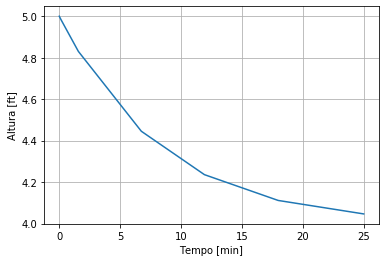

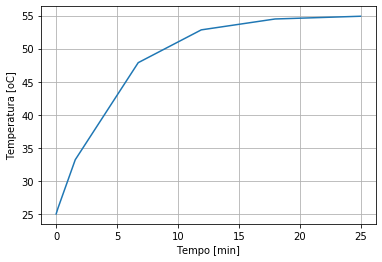

In [117]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir sistema de EDOs
def tanque1(t,x,Fin,k,A,Tin):
    h = x[0]
    T = x[1]
    Fout = k*np.sqrt(h)
    dhdt = (Fin-Fout)/A
    dTdt = Fin/(A*h)*(Tin-T)
    return [dhdt,dTdt]

# Parâmetros e constantes
Fin = 5
k = 2.5
A = 5
Tin = 55
# Condições iniciais
x0 = [5,25]
# Tempo de integração [min]
t = [0, 25]
sol = solve_ivp(tanque1,t,x0,method='RK45',args=(Fin,k,A,Tin))

# Gráficos
plot1 = plt.figure(1)
plt.plot(sol.t,sol.y[0,:])
plt.xlabel('Tempo [min]')
plt.ylabel('Altura [ft]')
plt.grid()
plot2 = plt.figure(2)
plt.plot(sol.t,sol.y[1,:])
plt.xlabel('Tempo [min]')
plt.ylabel('Temperatura [oC]')
plt.grid()

No exemplo acima, iniciamos importando as bibliotecas necessárias para, em seguida, definir a função que contém o sistema de EDOs a ser integrado (linhas 7 a 17, função _tanque1_). <br>
Lembremos que a definição de uma função a ser integrada pela função _solve_ivp_ é ligeiramente da definição para _odeint_, e deve ser da forma: <br>
<center> def nome_funcao(var_independente, var_dependente, argumentos_extras) </center> <br>

Nas linhas 8 e 9 realizamos a **troca de variáveis**. Inicialmente, utilizamos como símbolo representativo das variáveis dependentes a letra _x_. Note que o que, de fato, determina quem é $h$ e quem é $T$ é a ordem de declaração: <br>
- Na linha 21, _x0_ (vetor dos chutes iniciais) possui os valor 5 e 25, que representam as condições iniciais da altura e temperatura, respectivamente; <br>
- Chamamos a função a ser integrada na linha 24 utilizando _x0_, que contém os valores de ambas as condições iniciais; <br>
- Assim, ao entrar na função _tanque1_ (através da chamada da linhas 24) a variável _x_ contém os valores de $h$ e $T$ (nesta ordem); <br>
- Assim, a troca de variáveis é feita, onde x[0] passou a ser h e x[1] passou a ser T (nesta ordem, por causa da ordem que utilizamos desde o início); <br>
- A troca de variáveis foi feita para facilitar a escrita das duas EDOs do sistema, que, novamente, estão na ordem de $h$ e $T$. Dessa maneira, nas equações, não precisamos digitar x[0] ou x[1], pois essas variáveis tiveram sua nomenclatura trocada para $h$ e $T$. <br>
É possível notar também que, neste caso, plotamos 2 gráficos separadamente: um para o perfil da altura e outro para o perfil da temperatura. Para isso, utilizamos um comando inicial para cada figura (linhas 27 e 32). <br>

# Exercícios <br>
**1.** Dois tanques de armazenamento estão conectados em série. <br>

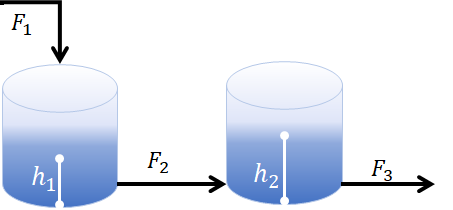 <br>
<br>
Os tanques 1 e 2 estão, inicialmente, com alturas de fluido iguais a 12 e 7 ft, respectivamente. <br>
O tanque 1 é alimentado a uma vazão de $5 ft^3/min$, enquanto a alimentação do tanque 2 depende, diretamente, da altura de fluido em ambos os tanques ($F_2 = k_2 \sqrt{h_1 - h_2}$). Assim, a vazão de saída do tanque 2 é dada por $k_3 \sqrt{h_2}$. <br>
Dados: <br>
$A_1 = 5 ft^2$ <br>
$A_2 = 10 ft^2$ <br>
$k_2 = 2.5 ft^{2.5}/min$ <br>
$k_3 = \frac{5}{\sqrt{6}} ft^{2.5}/min$ <br>
a) Faça o balanço de massa para os 2 tanques e encontre as equações que determinam a variação da altura de fluido ao longo do tempo em ambos os tanques. <br>
b) Faça a integração numérica do sistema de EDOs obtido; <br>
c) Produza um gráfico com o perfil de varição de altura ao longo do tempo para ambos os tanques.

In [93]:
# Insira eu código


<br>

**2.** Três tanques em série são usados para pré-aquecer uma solução de óleos antes de ser alimentada a uma coluna de destilação para separação. Cada tanque está, inicialmente, a 20ºC e possui 1000 kg de óleo. Vapor saturado a 250ºC condensa nas serpentinas dentro de cada tanque. O óleo é alimentado no primeiro tanque a 100 kg/min e flui para os tanques 2 e 3 à mesma vazão mássica. Os tanques são de mistura perfeita. Integre o balanço de energia utilizando as funções odeint e solve_ivp e produza uma figura com o perfil de variação de temperatura ao longo do tempo para os três tanques, com legenda, títulos dos eixos e linhas de grade. <br>
Dados: <br>
$C_{p,óleo}=2.0 \frac{kJ}{kg.ºC}$ <br>
$Q=UA(T_{vapor}-T_i )$ <br>
$ UA=10 \frac{kJ}{min.ºC}$ <br>
$\frac{dT}{dt}= \frac{WC_p (T_{i-1}-T_i )+UA(T_v-T_i)}{mC_p}$ <br>
Onde $i$ é o índice de cada um dos tanques.


In [ ]:
# Insira seu código
